# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования.

Выполнили студенты гр. 0383 Позолотин Константин и Смирнов Иван. Вариант №18.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

###Дискретизация непрерывного сигнала
преобразование непрерывного сигнала в последовательность чисел (отсчетов), то есть представление этого сигнала по какому-либо конечномерному базису

###Фильтрация сигнала
применение к сигналу специально модели, обрабатывающей его с целью выделения и/или подавления определённых частот этого сигнала, - фильтра

###Дискретное преобразование фурье
одно из преобразований Фурье, широко применяемых в алгоритмах цифровой обработки сигналов. Дискретное преобразование Фурье требует в качестве входа дискретную функцию. Такие функции часто создаются путём дискретизации:

$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$

###Передаточные функции
Передаточные функции - частотные характеристики, необходимые для синтеза фильтров

###Линейное сглаживание
Метод обработки данных, который используется для устранения шума и выравнивания кривых. Усреднение с помощью интерполяционных многочленов


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

###Задание 1-2
 Сформировать дискретный сигнал $x_0, x_1, ..., x_{N-1}$ посредством дискретизации $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \phi_k)$. Частота каждой из гармоник не превышает $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализуем коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включатьв  себя 32 отсчёта (N = 31).


Визуализировать исходные аналоговый и дискретизированный сигналы. Графики исходного аналогового и дискретизированного сигналов на интервале $k \in [0;31]$ представлены ниже. Из графиков видно, что сигнал периодичен с периодом N = 20.

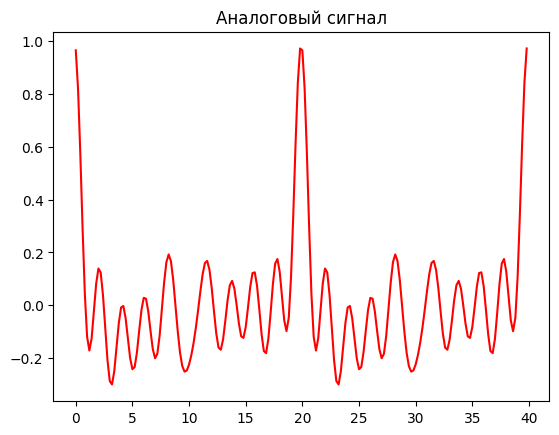

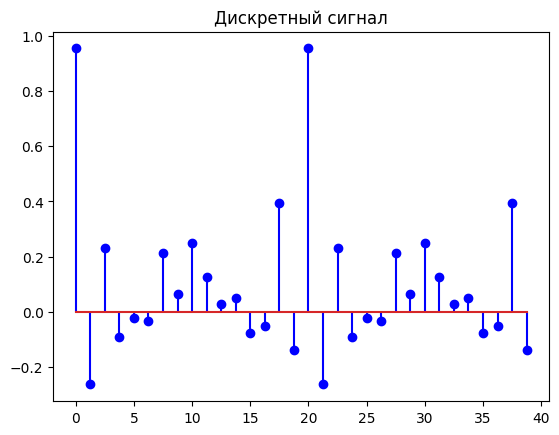

In [38]:
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, rfft
import matplotlib.pyplot as plt
import math
import random


def generate_sygnal(n=200):
    x = [40*i/n for i in range(n)]
    y = [0 for _ in range(n)]
    a = [random.randint(1, 11) for _ in range(11)]
    d = [random.randint(0, 10000)/20000 for _ in range(11)]
    for i in range(11):
        y = [y[j] + a[i]*math.cos(math.pi*i/10*x[j] + d[i]) for j in range(n)]

    y = [_y/sum(a) for _y in y]

    return x, y


xa, ya = generate_sygnal()
plt.plot(xa, ya, 'r-')
plt.title("Аналоговый сигнал")
plt.show()
xd, yd = generate_sygnal(32)
plt.stem(xd, yd, 'b-')
plt.title("Дискретный сигнал")
plt.show()

###Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Рассмотрим фрагмент последовательность ${x_k}$ из отсчётов N = 20. Получим дискретную функцию с периодом $NT$, где Т - период дискретизации:
$$ s(t) = \sum_{k=-\infty}^{+\infty} x_k\delta(t-kT) $$

Спектр $s(t)$ также должен быть периодическим (с периодом $\frac{2\pi}{T}$) и дискретным с расстоянием между гармониками $\frac {2\pi} {NT}$.

Поскольку s(t) - периодическая функция, разложим её с помощью быстрого преобразования фурье fft

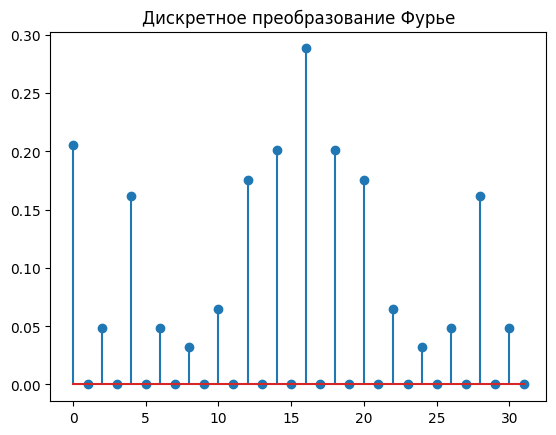

In [39]:

plt.stem(2*np.abs(fft(yd))/32)
plt.title('Дискретное преобразование Фурье')
plt.show()


###Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Передаточные функции:
$$H_5(\omega) = \frac {1}{5} (1 + 2cos\omega + 2 cos2\omega ) $$
$$H_9(\omega) = \frac {1}{5} (1 + 2cos\omega + 2cos2\omega + 2cos3\omega + 2cos4\omega )$$

Линейное склаживание:
$$y_{n, 5} = \frac{1}{5} \sum_{k=n-2}^{n+2} x_k $$
$$y_{n, 9} = \frac {1}{9} \sum_{k=n-4}^{n+4} x_k $$

###Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

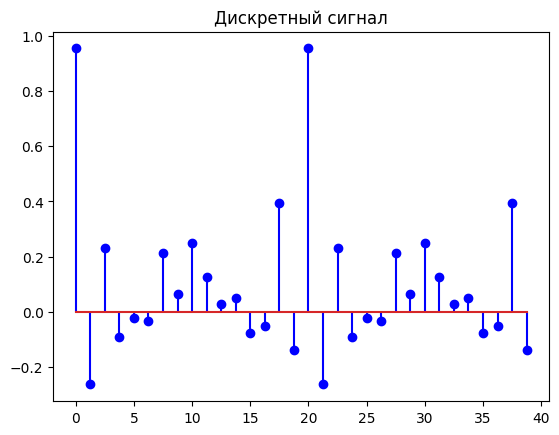

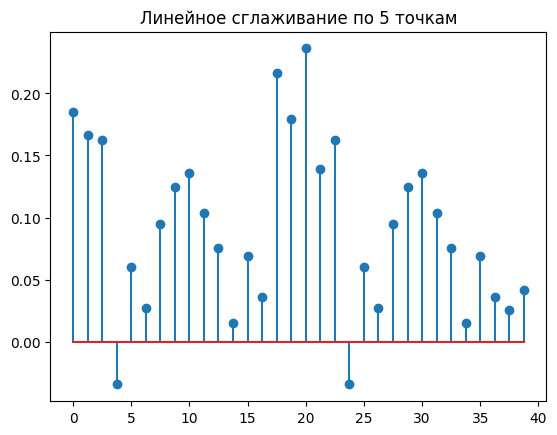

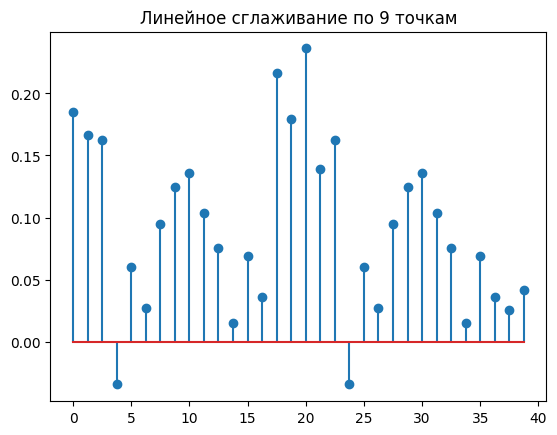

In [40]:
plt.stem(xd, yd, 'b-')
plt.title("Дискретный сигнал")
plt.show()
avg5 = np.convolve(yd, [1 for _ in range(5)], 'same') / 5
avg9 = np.convolve(yd, [1 for _ in range(9)], 'same') / 9
plt.stem(xd, avg5)
plt.title("Линейное сглаживание по 5 точкам")
plt.show()
plt.stem(xd, avg5)
plt.title("Линейное сглаживание по 9 точкам")
plt.show()

###Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

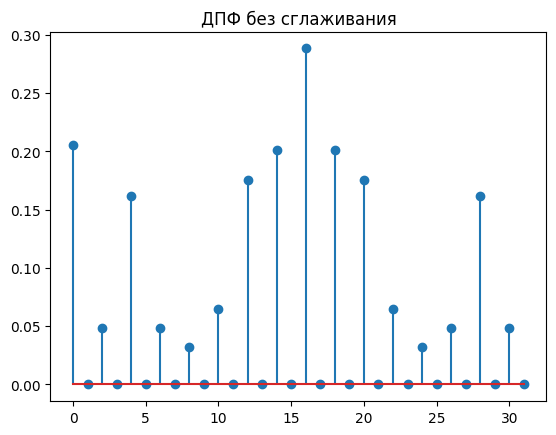

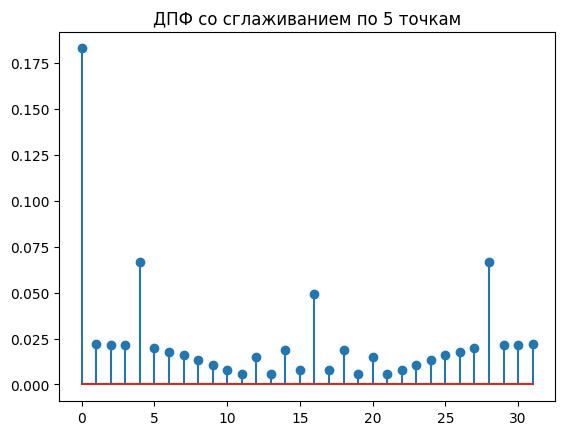

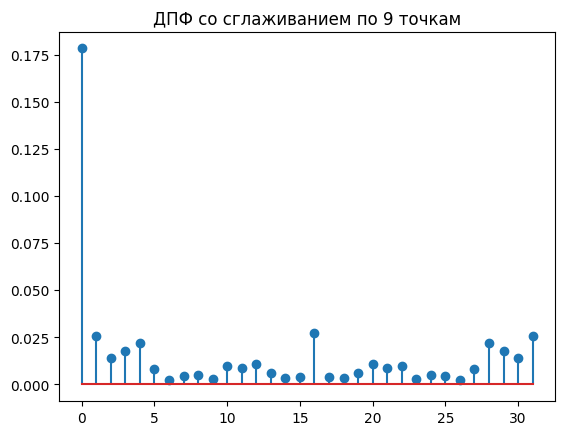

In [41]:
fy = 2*np.abs(fft(yd)) / len(fft(yd))
favg5 = 2 * np.abs(fft(avg5)) / len(fft(avg5))
favg9 = 2 * np.abs(fft(avg9)) / len(fft(avg9))

plt.stem(fy)
plt.title('ДПФ без сглаживания')
plt.show()

plt.stem(favg5)
plt.title('ДПФ со сглаживанием по 5 точкам')
plt.show()

plt.stem(favg9)
plt.title('ДПФ со сглаживанием по 9 точкам')
plt.show()

###Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы

Полученные результаты соответствуют значениям $H(\omega)$

Выводы:
Увеличение числа точек сглаживания "вдавливает" частотный ряд в пол, делая спад более резким и сужая полосу частот

###Задание 8
Повторить п. 4-7 для следующих фильтров:




####a
Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

Передаточная функция фильтра: $H(\omega) = i sin\omega$

Формула для численного дифференцирования 1-го порядка: $y_n^{'} = \frac{1}{2} (x_{n+1} - x_{n-1})$

График сигнала, полученного после фильтрации, представлен ниже.

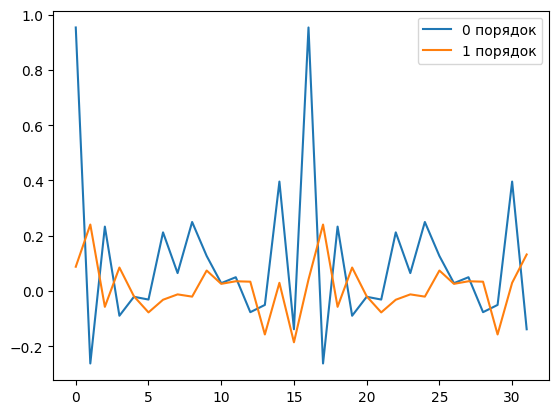

In [42]:
y_lvld1 = np.convolve(yd, [-1, 0, 1], 'same') / 3

plt.plot(yd, label='0 порядок')
plt.plot(y_lvld1, label='1 порядок')
plt.legend()
plt.show()



С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации. Дискретное преобразование Фурье:

$$X(n) = \sum_{k=0}^{N-1}y_ke^{-i\frac{2\pi n}{N}k}, n=0, 1, 2, ..., N - 1$$

Графики дискретных отсчётов спектра дискретного сигнала после его фильтрации совместно с отчётами спектра исходного дискретного сигнала на интервале представлены ниже.

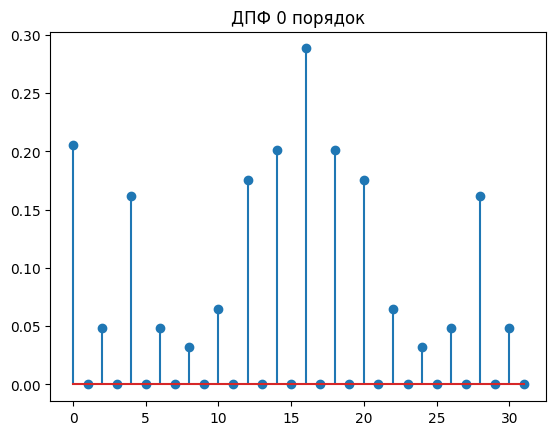

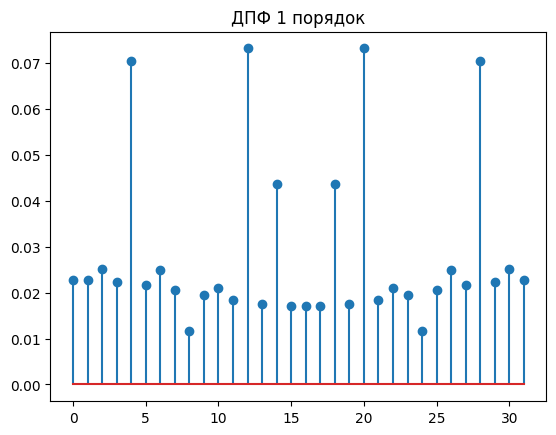

In [43]:
fy_lvld1 = 2 * np.abs(fft(y_lvld1)) / len(fft(y_lvld1))

plt.stem(fy)
plt.title('ДПФ 0 порядок')
plt.show()

plt.stem(fy_lvld1)
plt.title('ДПФ 1 порядок')
plt.show()


Полученные результаты соответствуют значениям $H(\omega)$

Выводы:
Такой фильтр подавляет низкие и высокие частоты, а средние сглаживает

####б)
Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Для дискретного сигнала применим дискретный фильтр, соответствующий численному интегрированию (средних прямоугольников $y_1(n)$, трапеций $y_2(n)$, Симпсона $y_3(n)$):

$$y_1(n) = y_1(n-1) + x_{2n-1}$$
$$y_2(n) = y_2(n-1) + \frac{1}{2}(x_n + x_{n+1})$$
$$y_3(n+1) = y_3(n-1) + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$$

Представим формулу для передаточной функции фильтра:

$$H_1(\omega) =\frac{1}{2sin\frac{\omega}{2}}$$
$$H_2(\omega) =\frac{cos\frac{\omega}{2}}{2sin\frac{\omega}{2}}$$
$$H_3(\omega) =\frac{(cos\omega + 2)}{3isin\omega}$$

График, полученный после фильтрации дискретного сигнала совместно с исходным дискретным сигналом, представлен ниже.

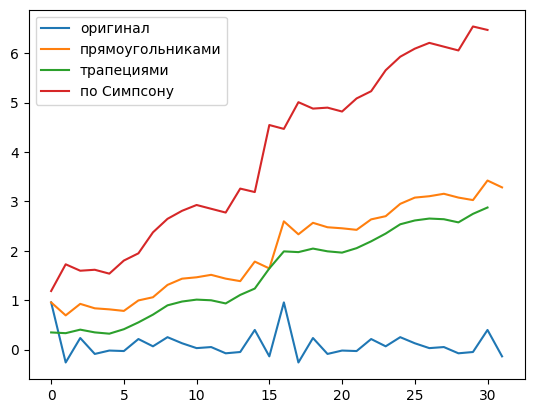

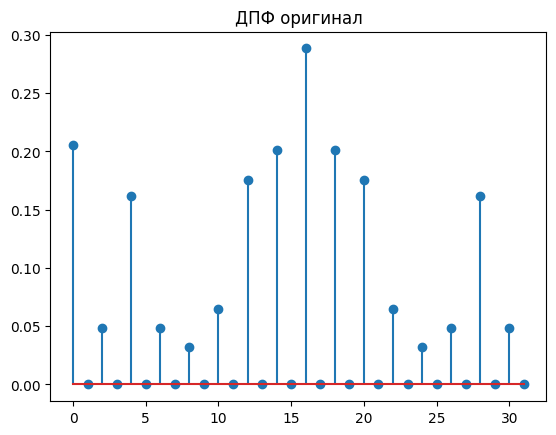

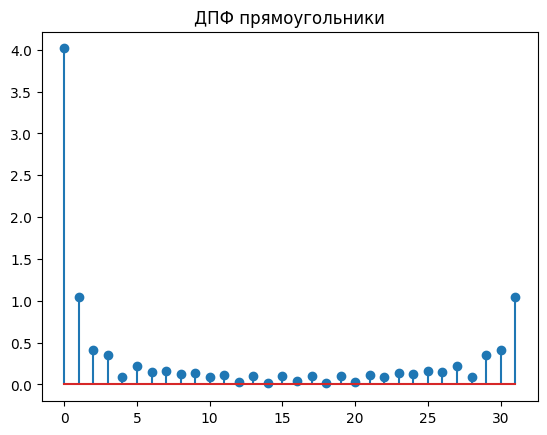

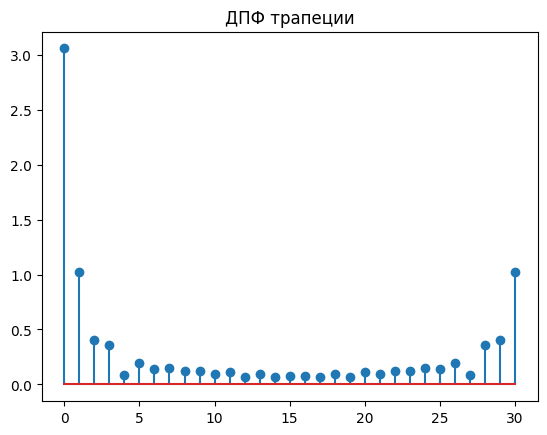

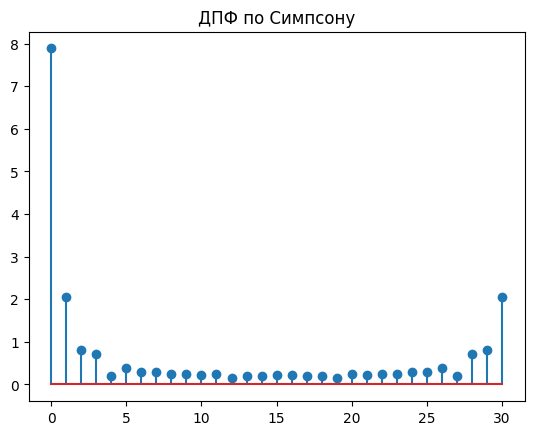

In [44]:
def integr_rect(f):
    res = []
    res.append(f[0])
    for val in f[1::]:
        res.append(res[-1] + val)
    return res


def integr_trap(f):
    res = []
    res.append((f[0] + f[1])/2)
    for i in range(1, len(f)-1):
        res.append(res[-1] + (f[i] + f[i+1]) / 2)
    return res

def integr_simpson(f):
    res = []
    res.append((4*f[0] + f[1])/3)
    for i in range(1, len(f)-1):
        res.append(res[-1] + (f[i-1] + f[i] + 4*f[i+1]) / 3)
    return res



y_rect = integr_rect(yd)
y_trap = integr_trap(yd)
y_simps = integr_simpson(yd)

plt.plot(yd, label='оригинал')
plt.plot(y_rect, label='прямоугольниками')
plt.plot(y_trap, label='трапециями')
plt.plot(y_simps, label='по Симпсону')
plt.legend()
plt.show()


fy_rect = 2 * np.abs(fft(y_rect)) / len(fft(y_rect))
fy_trap = 2 * np.abs(fft(y_trap)) / len(fft(y_trap))
fy_simps = 2 * np.abs(fft(y_simps)) / len(fft(y_simps))

plt.stem(fy)
plt.title('ДПФ оригинал')
plt.show()
plt.stem(fy_rect)
plt.title('ДПФ прямоугольники')
plt.show()
plt.stem(fy_trap)
plt.title('ДПФ трапеции')
plt.show()
plt.stem(fy_simps)
plt.title('ДПФ по Симпсону')
plt.show()

Полученные результаты соответствуют значениям  H(ω)

Выводы:
использование формул трапеции и прямоугольников усиливает низкие частоты и ослабляет остальные
у формулы трапеций это наиболее выражено
Формула Симпсона вдобавок к усилению низких частот усиливает и высокие, ослабляя только средние

## Выводы

В ходе выполнения практической работы производилось изучение процесса фильтрации дискретных последовательностей с использованием рекурсивных фильтров, которые основаны на формулах численного интегрирования и дифференцирования. Также, с помощью дискретных преобразований Фурье проводился анализ полученных результатов. В процессе работы был создан аналоговый сигнал, который был преобразован в дискретный вид, и для него был построен спектр, представляющий собой набор дискретных отсчетов. Было установлено, что с помощью спектра можно определить наличие различных частот в исходном сигнале.

В процессе выполнения практической работы изучались и применялись различные фильтры. Были рассмотрены и применены фильтры линейного сглаживания и дискретные фильтры, которые соответствуют численному дифференцированию 1-го порядка и численному интегрированию. Также использовались методы прямоугольников, трапеций и парабол для численного интегрирования. Анализируя результаты работы, можно сделать следующий вывод о рассматриваемом фильтре, соответствующем дифференцированию 1-го порядка: данный фильтр имеет полосу пропускания в средних частотах и снижает амплитуду низких и высоких частот.

Также было установлено, что фильтры, соответствующие численному интегрированию по формуле трапеций и по формуле прямоугольников, существенно усиливают низкие частоты и подавляют средние и высокие частоты. При этом у формулы трапеций наблюдается большее понижение средних и высоких частот, чем у формулы прямоугольников.

Кроме того, формула Симпсона сильно усиливает низкие и высокие частоты, но подавляет средние частоты. Это отличает ее от формулы трапеции и прямоугольника.